In [14]:
!pip install pandas numpy matplotlib seaborn scipy statsmodels scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

cali = fetch_california_housing()# Create a DataFrame
cali_df = pd.DataFrame(cali.data, columns=cali.feature_names)
cali_df['MedHouseVal'] = cali.target

cali_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


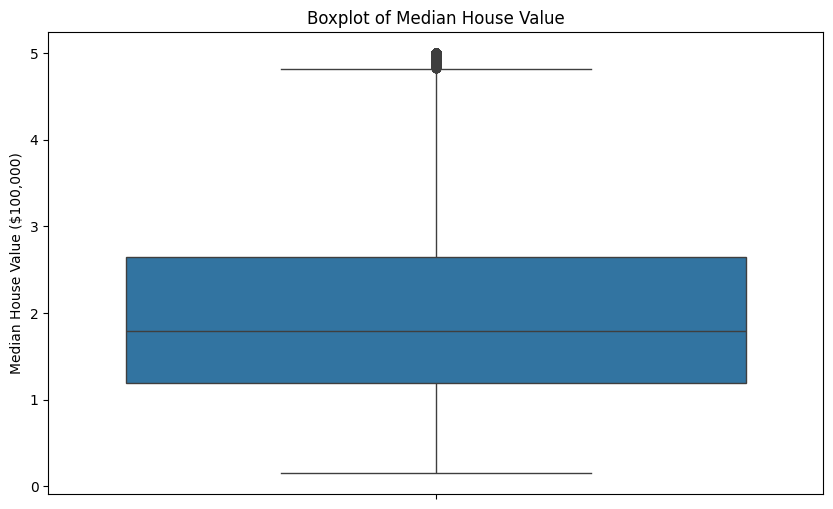

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(y=cali_df['MedHouseVal'])
plt.title('Boxplot of Median House Value')
plt.ylabel('Median House Value ($100,000)')
plt.show()


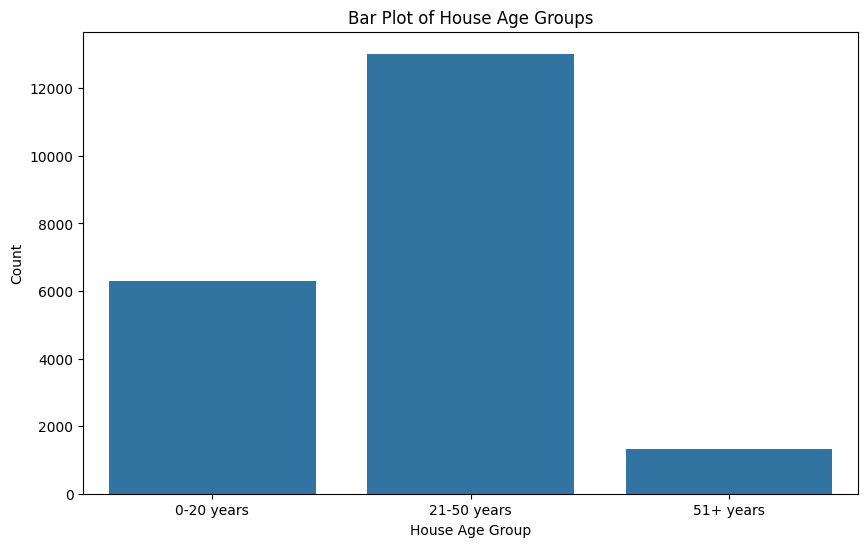

In [17]:
bins = [0, 20, 50, 100]
labels = ['0-20 years', '21-50 years', '51+ years']
cali_df['HouseAgeGroup'] = pd.cut(cali_df['HouseAge'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.countplot(x=cali_df['HouseAgeGroup'])
plt.title('Bar Plot of House Age Groups')
plt.xlabel('House Age Group')
plt.ylabel('Count')
plt.show()


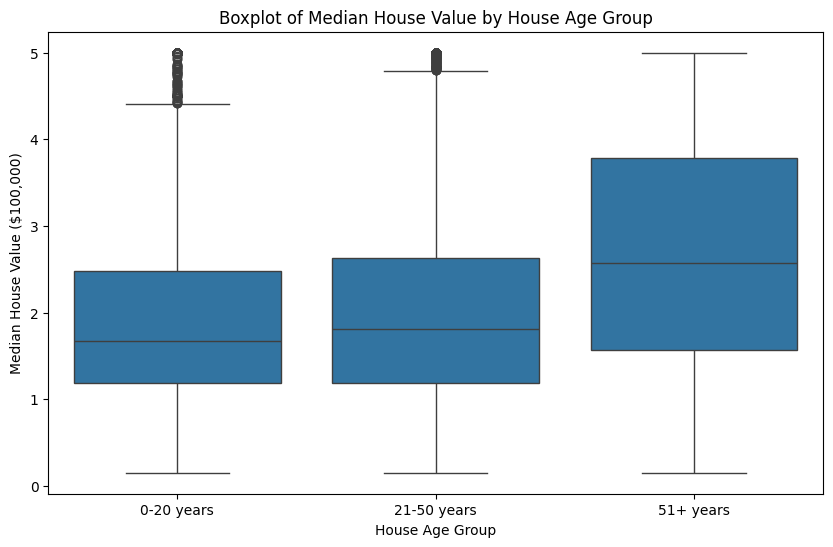

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HouseAgeGroup', y='MedHouseVal', data=cali_df)
plt.title('Boxplot of Median House Value by House Age Group')
plt.xlabel('House Age Group')
plt.ylabel('Median House Value ($100,000)')
plt.show()


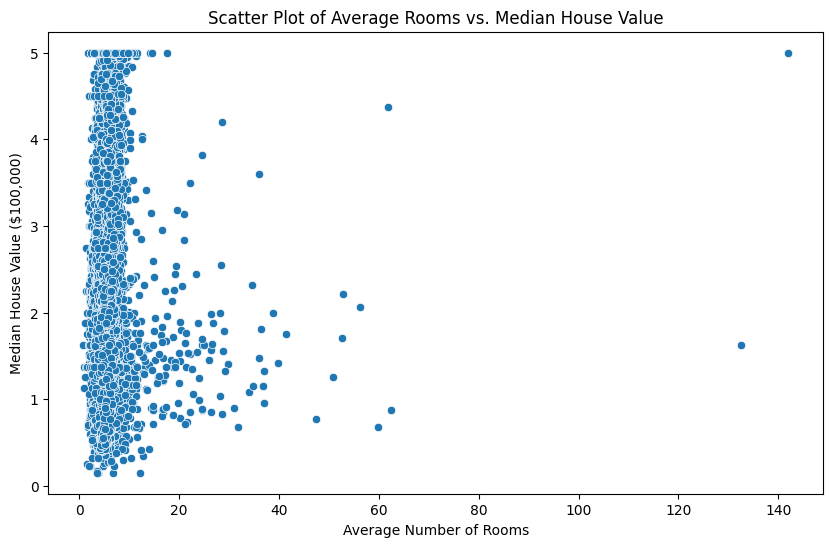

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=cali_df)
plt.title('Scatter Plot of Average Rooms vs. Median House Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value ($100,000)')
plt.show()


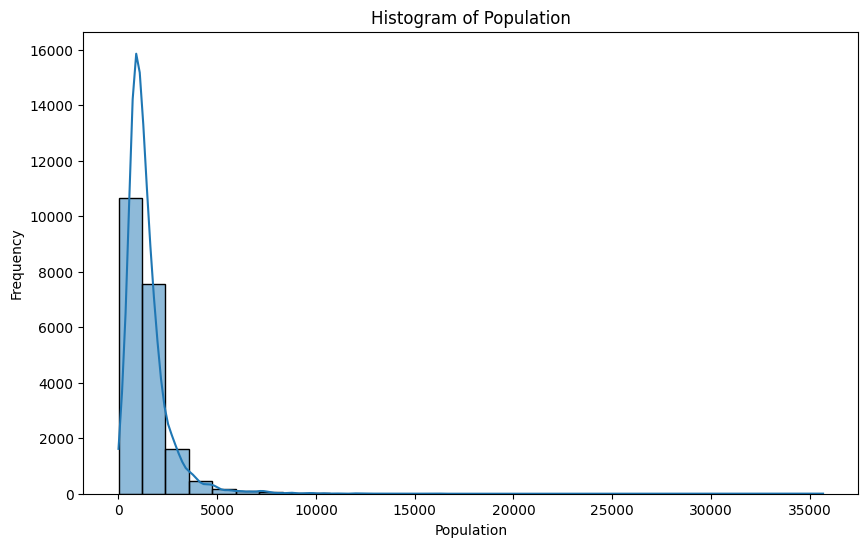

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(cali_df['Population'], bins=30, kde=True)
plt.title('Histogram of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()


In [21]:
from scipy.stats import ttest_ind

age_group1 = cali_df[cali_df['HouseAgeGroup'] == '0-20 years']['MedHouseVal']
age_group2 = cali_df[cali_df['HouseAgeGroup'] == '21-50 years']['MedHouseVal']

t_stat, p_value = ttest_ind(age_group1, age_group2)
alpha = 0.05

print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the median house values between the two age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the median house values between the two age groups.")


T-statistic: -7.627052795760898, P-value: 2.5128643774434372e-14
Reject the null hypothesis. There is a significant difference in the median house values between the two age groups.


In [22]:
from scipy.stats import f_oneway

anova_result = f_oneway(
    cali_df[cali_df['HouseAgeGroup'] == '0-20 years']['MedHouseVal'],
    cali_df[cali_df['HouseAgeGroup'] == '21-50 years']['MedHouseVal'],
    cali_df[cali_df['HouseAgeGroup'] == '51+ years']['MedHouseVal']
)

print(f"F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There is a difference in the median house values among different age groups.")
else:
    print("Fail to reject the null hypothesis. There is no difference in the median house values among different age groups.")


F-statistic: 270.98817762235876, P-value: 6.76372433763017e-117
Reject the null hypothesis. There is a difference in the median house values among different age groups.


In [23]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(cali_df['AveRooms'], cali_df['MedHouseVal'])

print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis. There is a relationship between average rooms and median house value.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between average rooms and median house value.")


Pearson correlation coefficient: 0.15194828974145783, P-value: 7.569242134483651e-107
Reject the null hypothesis. There is a relationship between average rooms and median house value.


In [24]:
import statsmodels.api as sm

X = cali_df['AveRooms']
y = cali_df['MedHouseVal']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

if model.pvalues['AveRooms'] < alpha:
    print("Reject the null hypothesis. Average rooms significantly impact median house value.")
else:
    print("Fail to reject the null hypothesis. Average rooms do not significantly impact median house value.")


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     487.8
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          7.57e-107
Time:                        22:40:50   Log-Likelihood:                -32001.
No. Observations:               20640   AIC:                         6.401e+04
Df Residuals:                   20638   BIC:                         6.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6838      0.019     87.952      0.0